## **Analyzing Risk Factors for COVID-19 Death**

### **Introduction**
COVID-19 affects people in different ways. In this project, I was interested in using the latest data on COVID-19 pandemic from ourworldindata.org to understand and find answers for:

    1. How the increase of hospital beds could help in reducing Covid-19 deaths?
    2. Will handwashing facility access improve Covid-19 infection control?
    3. Could diabetes prevalence affect the death toll of Covid-19?


    
Standard methodologies like data acquisition, preparation and exploration will be used. Also data representation and visualizations will be provided.




In [62]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [63]:
# let's have a general view of our dataset 
df = pd.read_excel('owid-covid-data.xlsx')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [64]:
# Let's have a look at the number of rows and columns:
total_rows = len(df.axes[0]) #Provide the number of rows in the dataset
total_cols = len(df.axes[1]) #Provide the number of columns in the dataset

print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 33837
Number of Columns: 34


### **Question 1**

#### *1.* *How the increase of Hospital Beds could help in reducing COVID-19 deaths?*


##### **Data Preparation**


In [65]:
# Get the subset related to this question and remove null values from hospital_beds_per_thousand
small_dataset = pd.DataFrame({'country': df.location, 
                              'new_death': df.new_deaths_per_million,
                              'beds': df.hospital_beds_per_thousand})

df_bedna = small_dataset[small_dataset.beds.notna()]

# Remove all rows for 'World' location 
df_worldno = df_bedna[df_bedna.country != 'World']
df_worldno

,country,new_death,beds
0,Afghanistan,0.000,0.5
1,Afghanistan,0.000,0.5
2,Afghanistan,0.000,0.5
3,Afghanistan,0.000,0.5
4,Afghanistan,0.000,0.5
...,...,...,...
33554,Zimbabwe,0.000,1.7
33555,Zimbabwe,0.135,1.7
33556,Zimbabwe,0.269,1.7
33557,Zimbabwe,0.067,1.7


**Data Exploration**

In [66]:
# We will group the data by country and get total deaths and number of beds 
grouping = {'new_death': ['sum'], 'beds':['mean']}

df_byCountry = df_worldno.groupby('country').agg(grouping).reset_index()
df_byCountry

,country,new_death,beds
,,sum,mean
0,Afghanistan,32.650,0.50
1,Albania,53.495,2.89
2,Algeria,27.365,1.90
3,Antigua and Barbuda,30.635,3.80
4,Argentina,73.264,5.00
...,...,...,...
159,Venezuela,5.560,0.80
160,Vietnam,0.000,2.60
161,Yemen,16.340,0.70


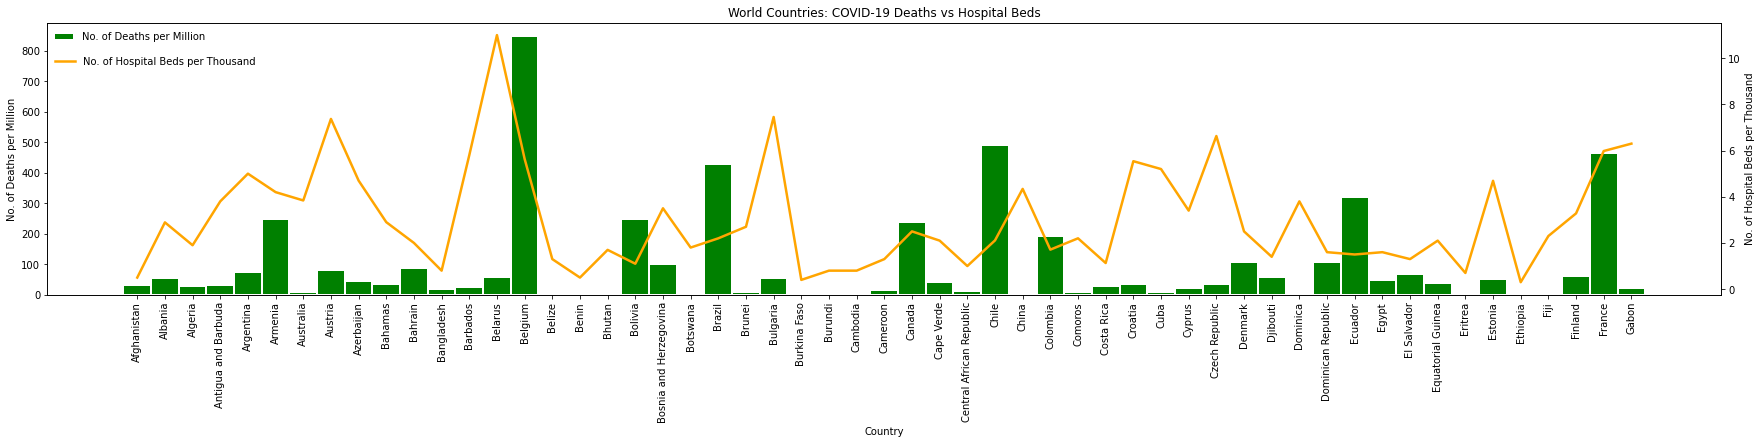

In [173]:
# Creating two sub-datasets for number of deaths and number of beds
df_deaths = df_byCountry[['country','new_death']]
df_beds = df_byCountry[['country','beds']]

# Dividing both datasets into three parts to fit nicely on the charts
death_country = df_deaths['country'].loc[0:54]  
death_total = df_deaths['new_death'].sum(1).loc[0:54] 
bed_country = df_beds['country'].loc[0:54] 
bed_total = df_beds['beds'].mean(1).loc[0:54] 

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Hospital Beds")
plt.xticks(rotation='90')

plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(bed_country, bed_total, color='orange', label='No. of Hospital Beds per Thousand', linewidth=2.5)
line.set_ylabel('No. of Hospital Beds per Thousand')

plt.legend(loc='best', bbox_to_anchor=(0.13, .91), frameon=False)

plt.show() 

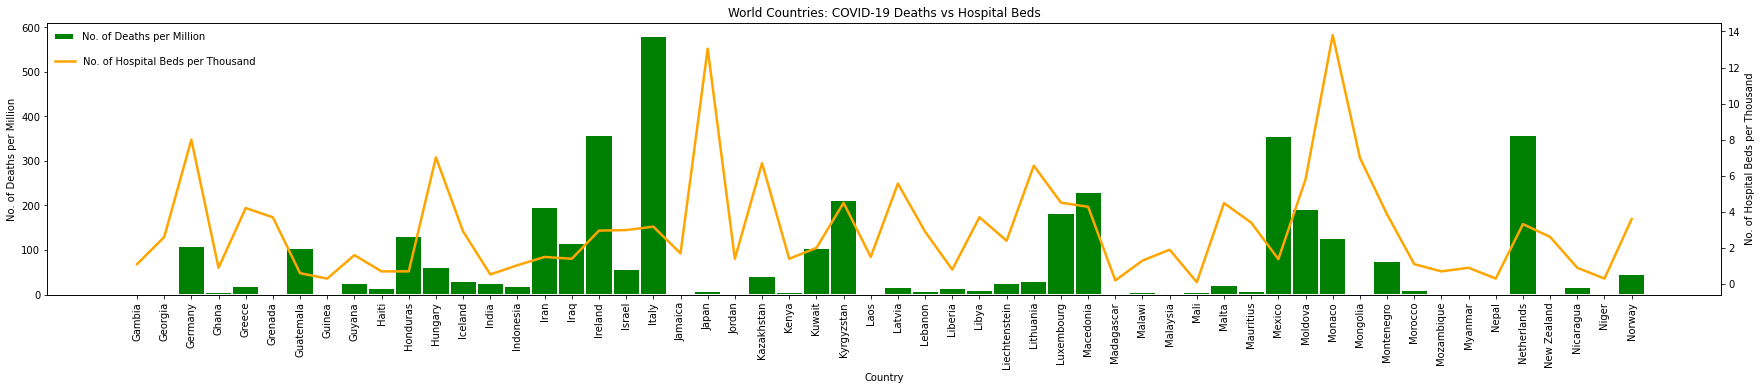

In [174]:
# Creating two sub-datasets for number of deaths and number of beds
df_deaths = df_byCountry[['country','new_death']]
df_beds = df_byCountry[['country','beds']]

# Showing the second part of the datasets
death_country = df_deaths['country'].loc[55:110]  
death_total = df_deaths['new_death'].sum(1).loc[55:110] 
bed_country = df_beds['country'].loc[55:110] 
bed_total = df_beds['beds'].mean(1).loc[55:110] 

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Hospital Beds")
plt.xticks(rotation='90')

plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(bed_country, bed_total, color='orange', label='No. of Hospital Beds per Thousand', linewidth=2.5)
line.set_ylabel('No. of Hospital Beds per Thousand')

plt.legend(loc='best', bbox_to_anchor=(0.13, .91), frameon=False)

plt.show() 

**We could notice from above two charts which represent more than half of our countries dataset, Japan has the largest number of Hospital Beds with number of deaths equals almost 0. In addition, other countries like Austria, Bulgaria, Hungary, and Belarus have good Hospital facilities, which reflect positively on number of deaths in these countries.**

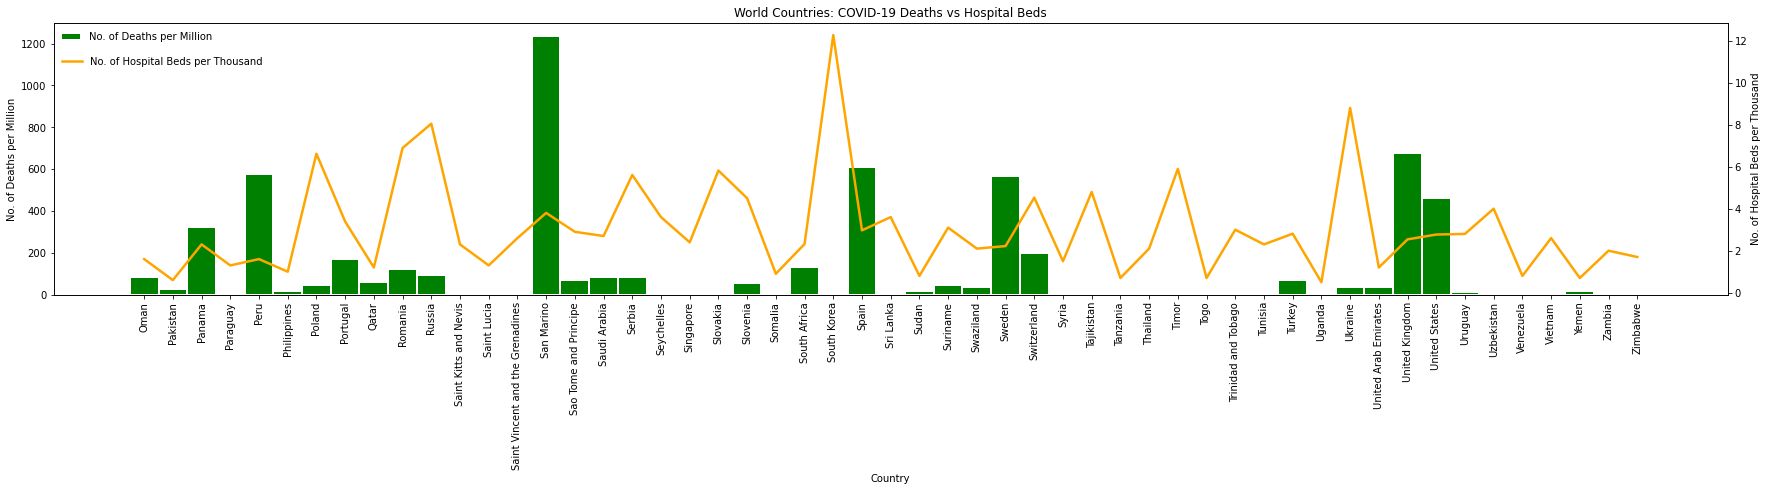

In [175]:
# Showing the third part of the datasets
death_country = df_deaths['country'].loc[111:164]
death_total = df_deaths['new_death'].sum(1).loc[111:164]  
bed_country = df_beds['country'].loc[111:164] 
bed_total = df_beds['beds'].mean(1).loc[111:164]

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Hospital Beds")
plt.xticks(rotation='90')

plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(bed_country, bed_total, color='orange', label='No. of Hospital Beds per Thousand', linewidth=2.5)
line.set_ylabel('No. of Hospital Beds per Thousand')

plt.legend(loc='best', bbox_to_anchor=(0.13, .91), frameon=False)

plt.show() 

**More supporting evidence could be noticed from above chart, which represent the last part of our countries dataset. Countries like South Korea, Ukraine, and Russia have good Hospital facilities, which reflect positively on number of deaths in these countries.**

##### **Therefore, the final assumption which we could get form the results of both charts that increasing the number of hospital beds may help in reducing the number of deaths.**

### **Question 2**

#### *2.* *Will handwashing facility access improve Covid-19 infection control?*

##### **Data Preparation**

In [178]:
# Get the subset related to this question and remove null values from handwashing_facilities
small_dataset = pd.DataFrame({'country': df.location, 
                              'new_death': df.new_deaths_per_million,
                              'handwash': df.handwashing_facilities})

df_handwashna = small_dataset[small_dataset.handwash.notna()]

# Remove all rows for 'World' location 
df_worldno = df_handwashna[df_handwashna.country != 'World']
df_worldno

,country,new_death,handwash
0,Afghanistan,0.000,37.746
1,Afghanistan,0.000,37.746
2,Afghanistan,0.000,37.746
3,Afghanistan,0.000,37.746
4,Afghanistan,0.000,37.746
...,...,...,...
33554,Zimbabwe,0.000,36.791
33555,Zimbabwe,0.135,36.791
33556,Zimbabwe,0.269,36.791
33557,Zimbabwe,0.067,36.791


**We noticed that more than half of the dataset have null values in handwashing facilities column which might affect our final results from this analysis.**

**Data Exploration**

In [179]:
# We will group the data by country and get total deaths and handwashing facilities parentage
grouping = {'new_death': ['sum'], 'handwash':['mean']}

df_byCountry = df_worldno.groupby('country').agg(grouping).reset_index()
df_byCountry

,country,new_death,handwash
,,sum,mean
0,Afghanistan,32.650,37.746
1,Algeria,27.365,83.741
2,Angola,1.453,26.664
3,Armenia,249.040,94.043
4,Azerbaijan,43.503,83.241
...,...,...,...
86,Uganda,0.044,21.222
87,Vietnam,0.000,85.847
88,Yemen,16.340,49.542


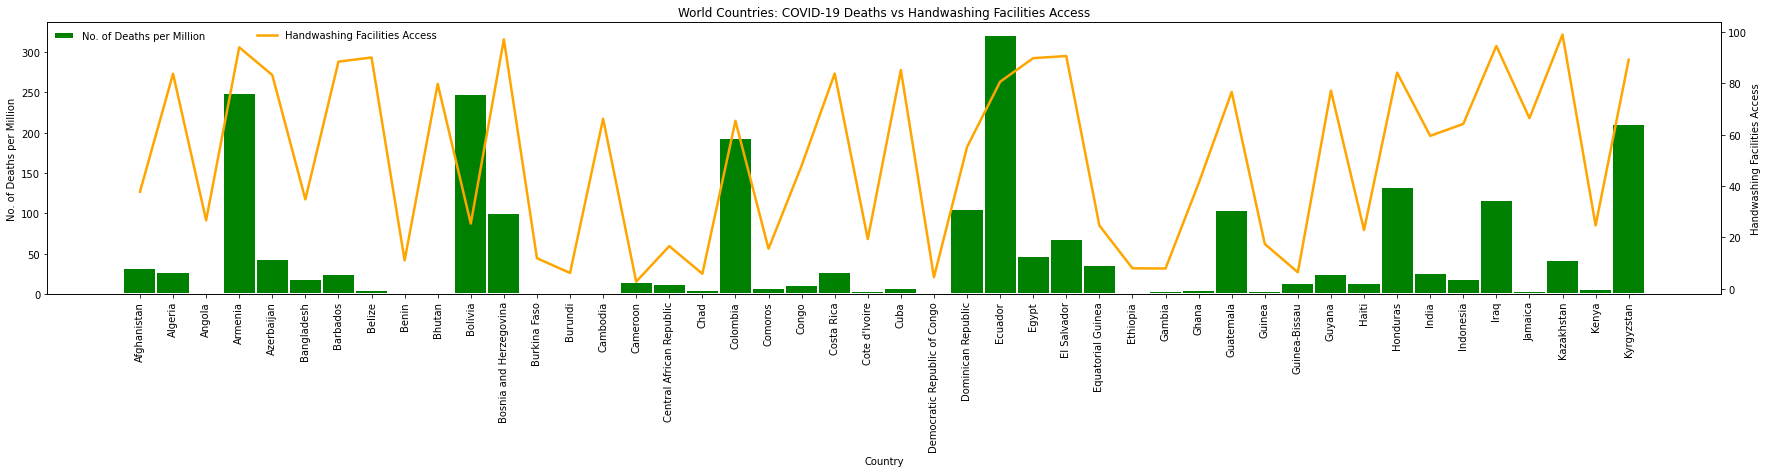

In [193]:
# Creating two sub-datasets for number of deaths and handwashing facilities parentage
df_deaths = df_byCountry[['country','new_death']]
df_handwash = df_byCountry[['country','handwash']]

# Dividing both datasets into two parts to fit nicely on the charts
death_country = df_deaths['country'].head(46) 
death_total = df_deaths['new_death'].sum(1).head(46)  
handwash_country = df_handwash['country'].head(46) 
handwash_total = df_handwash['handwash'].mean(1).head(46)

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Handwashing Facilities Access") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(handwash_country, handwash_total, color='orange', label='Handwashing Facilities Access', linewidth=2.5)
line.set_ylabel('Handwashing Facilities Access')
plt.legend(loc='best', bbox_to_anchor=(0.12, .90), frameon=False)

plt.show() 

**We could not tell clearly from above chart if the improve of handwashing facilities access could help in reducing the number of deaths associated for each country. However, countries like Kazakhstan, Iraq, Costa Rica, and Barbados have excellent handwashing facilities access and number of deaths associated are relatively low. Of course, there are countries like Armenia and Ecuador which have good handwashing facilities access but still have a high number of deaths which conflict our assumption.**

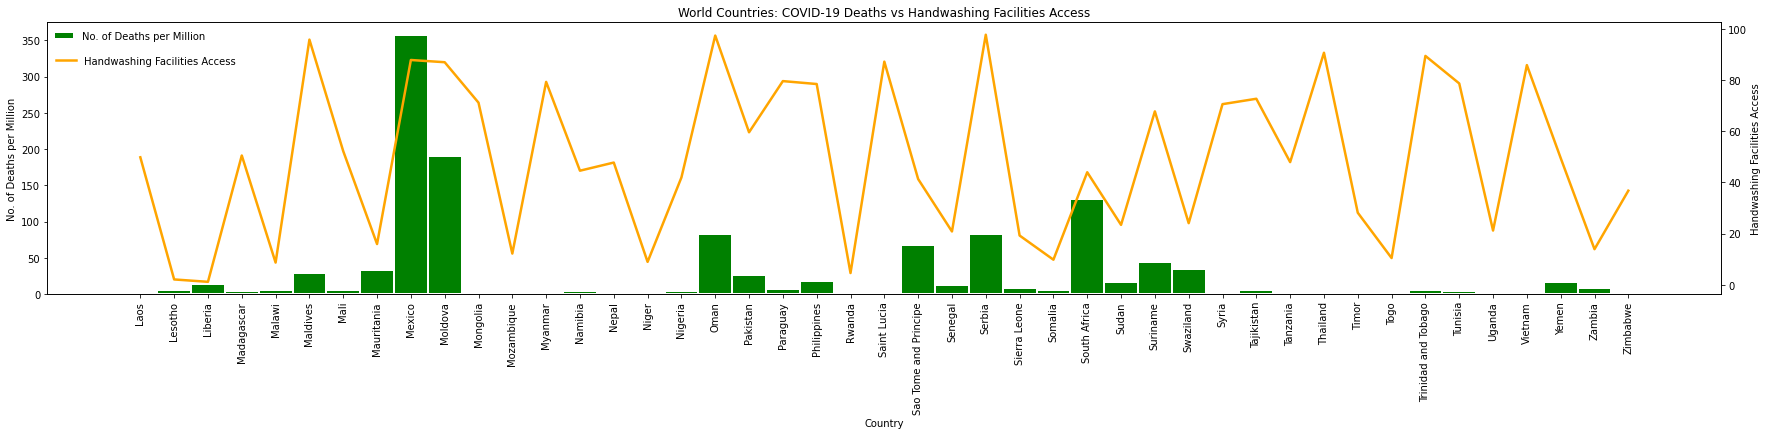

In [199]:
# Showing the second part of the datasets
death_country = df_deaths['country'].tail(45) 
death_total = df_deaths['new_death'].sum(1).tail(45)  
handwash_country = df_handwash['country'].tail(45) 
handwash_total = df_handwash['handwash'].mean(1).tail(45)

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Handwashing Facilities Access") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(handwash_country, handwash_total, color='orange', label='Handwashing Facilities Access', linewidth=2.5)
line.set_ylabel('Handwashing Facilities Access')
plt.legend(loc='best', bbox_to_anchor=(0.118, .91), frameon=False)

plt.show() 

**Perhaps the above chart explain better relationship between handwashing facilities access and number of deaths associated for each country. It is clearly showing that most of countries like Maldives, Oman, Serbia, Thailand, Trinidad and Tobago, and Vietnam have excellent handwashing facilities access and number of deaths associated are relatively low.**

##### **In general, we could conclude from the results of both charts that increasing the number of handwashing facilities access may slightly help in reducing the number of deaths.**

### **Question 3**

#### *3. Could diabetes prevalence affect the death toll of Covid-19?*

**Data Preparation**

In [200]:
# Get the subset related to this question and remove null values from diabetes_prevalence
small_dataset = pd.DataFrame({'country': df.location, 
                              'new_death': df.new_deaths_per_million,
                              'diabete': df.diabetes_prevalence})

df_diabetena = small_dataset[small_dataset.diabete.notna()]

# Remove all rows for 'World' location 
df_worldno = df_diabetena[df_diabetena.country != 'World']
df_worldno

,country,new_death,diabete
0,Afghanistan,0.000,9.59
1,Afghanistan,0.000,9.59
2,Afghanistan,0.000,9.59
3,Afghanistan,0.000,9.59
4,Afghanistan,0.000,9.59
...,...,...,...
33554,Zimbabwe,0.000,1.82
33555,Zimbabwe,0.135,1.82
33556,Zimbabwe,0.269,1.82
33557,Zimbabwe,0.067,1.82


**Data Exploration**

In [201]:
# We will group the data by country and get total deaths and diabetes_prevalence
grouping = {'new_death': ['sum'], 'diabete':['mean']}

df_byCountry = df_worldno.groupby('country').agg(grouping).reset_index()
df_byCountry

,country,new_death,diabete
,,sum,mean
0,Afghanistan,32.650,9.59
1,Albania,53.495,10.08
2,Algeria,27.365,6.73
3,Andorra,672.998,7.97
4,Angola,1.453,3.94
...,...,...,...
188,Venezuela,5.560,6.47
189,Vietnam,0.000,6.00
190,Yemen,16.340,5.35


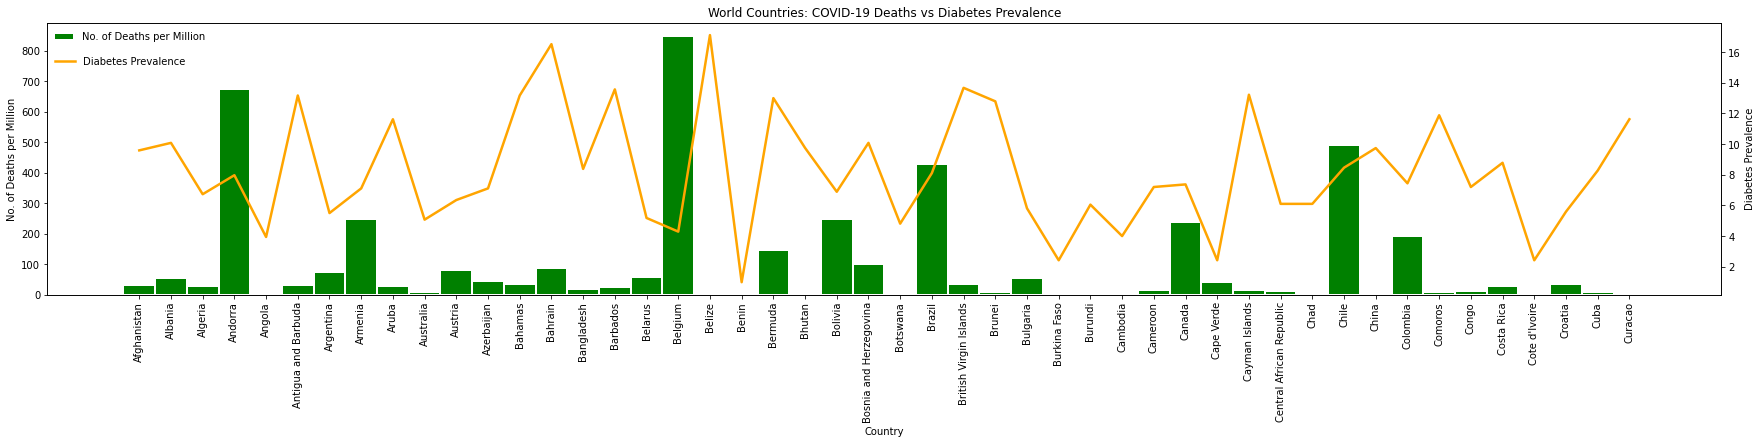

In [212]:
# Creating two sub-datasets for number of deaths and diabetes_prevalence
df_deaths = df_byCountry[['country','new_death']]
df_diabete = df_byCountry[['country','diabete']]

# Dividing both datasets into four parts to fit nicely on the charts
death_country = df_deaths['country'].loc[0:47] 
death_total = df_deaths['new_death'].sum(1).loc[0:47]  
diabete_country = df_diabete['country'].loc[0:47]
diabete_total = df_diabete['diabete'].mean(1).loc[0:47]

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Diabetes Prevalence") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(diabete_country, diabete_total, color='orange', label='Diabetes Prevalence', linewidth=2.5)
line.set_ylabel('Diabetes Prevalence')
plt.legend(loc='best', bbox_to_anchor=(0.088, .91), frameon=False)

plt.show() 

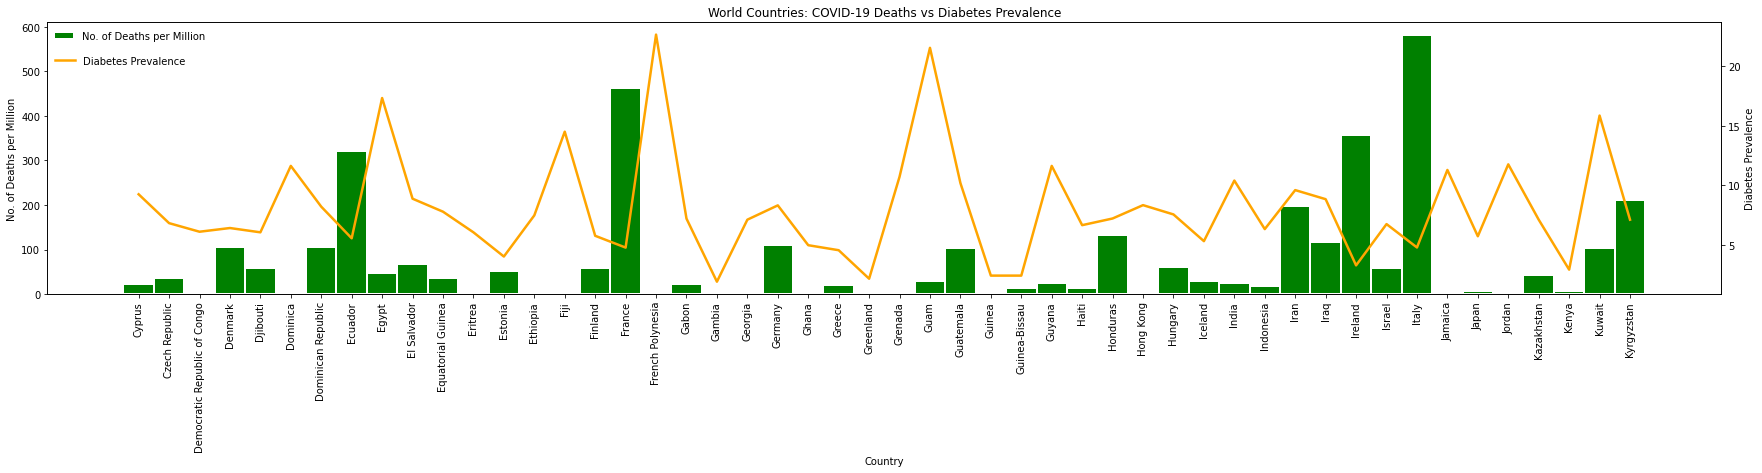

In [213]:
# Creating two sub-datasets for number of deaths and diabetes_prevalence
df_deaths = df_byCountry[['country','new_death']]
df_diabete = df_byCountry[['country','diabete']]

# Showing the second part of our group
death_country = df_deaths['country'].loc[48:97] 
death_total = df_deaths['new_death'].sum(1).loc[48:97]
diabete_country = df_diabete['country'].loc[48:97]
diabete_total = df_diabete['diabete'].mean(1).loc[48:97]

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Diabetes Prevalence") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(diabete_country, diabete_total, color='orange', label='Diabetes Prevalence', linewidth=2.5)
line.set_ylabel('Diabetes Prevalence')
plt.legend(loc='best', bbox_to_anchor=(0.088, .91), frameon=False)

plt.show() 

**The above two charts do not support the assumption that increase of diabetes prevalence could increase the number of deaths associated for each country. We may noticed that for countries like Andorra, Belgium, France, and Italy which have low diabetes values and they have big number of deaths associated. Other countries which support our assumption do exist but the overall view does not seem to be supporting our claim.**

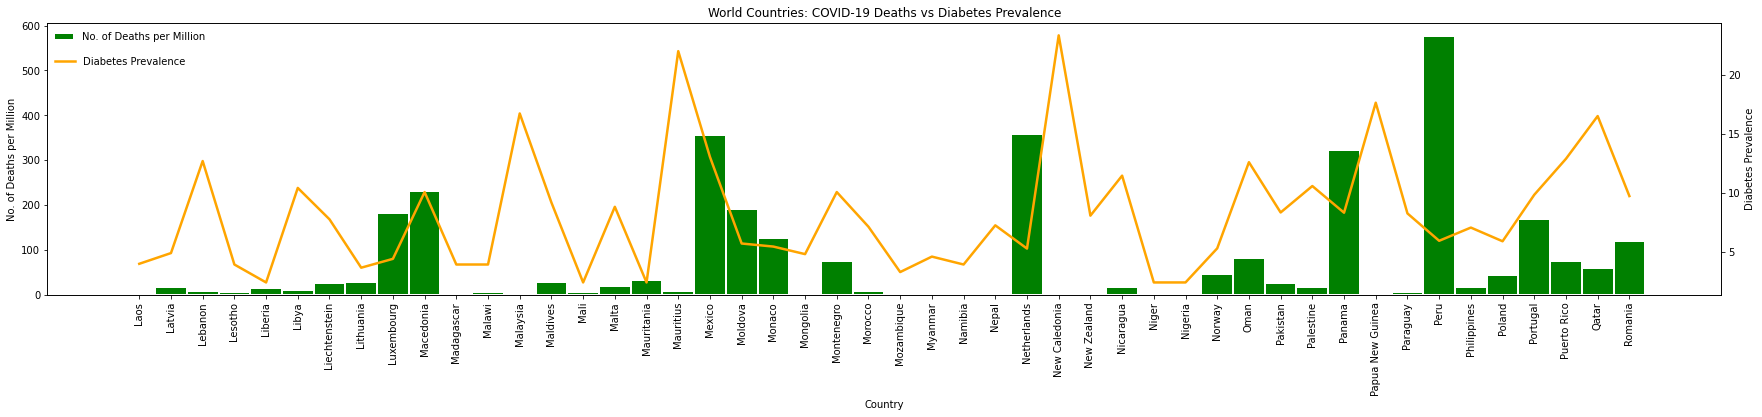

In [215]:
# Creating two sub-datasets for number of deaths and diabetes_prevalence
df_deaths = df_byCountry[['country','new_death']]
df_diabete = df_byCountry[['country','diabete']]

# Showing the third part of our group
death_country = df_deaths['country'].loc[98:145] 
death_total = df_deaths['new_death'].sum(1).loc[98:145] 
diabete_country = df_diabete['country'].loc[98:145] 
diabete_total = df_diabete['diabete'].mean(1).loc[98:145] 

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Diabetes Prevalence") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(diabete_country, diabete_total, color='orange', label='Diabetes Prevalence', linewidth=2.5)
line.set_ylabel('Diabetes Prevalence')
plt.legend(loc='best', bbox_to_anchor=(0.088, .91), frameon=False)

plt.show() 

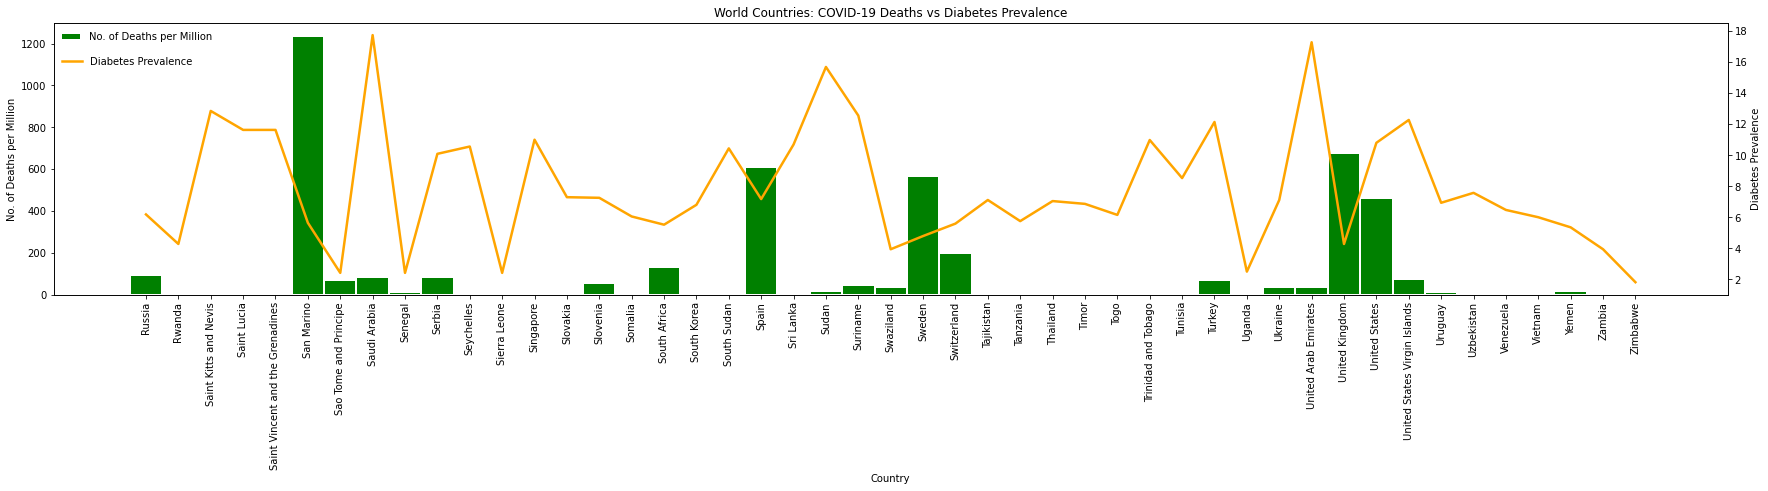

In [214]:
# Creating two sub-datasets for number of deaths and diabetes_prevalence
df_deaths = df_byCountry[['country','new_death']]
df_diabete = df_byCountry[['country','diabete']]

# Showing the fourth part of our group
death_country = df_deaths['country'].loc[146:193] 
death_total = df_deaths['new_death'].sum(1).loc[146:193]  
diabete_country = df_diabete['country'].loc[146:193]  
diabete_total = df_diabete['diabete'].mean(1).loc[146:193]  

# Creating the bar plot 
fig = plt.figure(figsize = (30, 5))  
plt.bar(death_country, death_total, color='green', width=1.0, edgecolor='white', linewidth=2, label='No. of Deaths per Million') 
plt.xlabel("Country") 
plt.ylabel("No. of Deaths per Million") 
plt.title("World Countries: COVID-19 Deaths vs Diabetes Prevalence") 
plt.xticks(rotation='90')
plt.legend(loc='best', bbox_to_anchor=(0.1, 1.00), frameon=False)

# Creating the line plot 
line = plt.twinx()
line.plot(diabete_country, diabete_total, color='orange', label='Diabetes Prevalence', linewidth=2.5)
line.set_ylabel('Diabetes Prevalence')
plt.legend(loc='best', bbox_to_anchor=(0.088, .91), frameon=False)

plt.show() 

**The above two charts showed the other half of our countries dataset. Again, the assumption has been contradicted and here we could see that diabetes prevalence didn't show big impact on the number of deaths associated for each country. The case has been noticed in Mauritius, New Caledonia, Saudi Arabia, Sudan, and United State of Emirates.**

##### **In general, we could conclude from the results of all charts that diabetes prevalence in countries may not have direct impact in the number of deaths.**